In [18]:
from sklearn.datasets import load_digits
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
digits = load_digits()
x = digits.data
y = digits.target
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
classifier = LogisticRegression()
from sklearn.grid_search import GridSearchCV
parameters = {'C':list(np.power(10.0, np.arange(-10, 3)))
        ,'penalty':['l1','l2']
        ,'max_iter':[100,1000,10000]
        ,'fit_intercept':[True,False]
        ,'tol':[1e-1,1e-2,1e-3,1e-4]}
LRclf = GridSearchCV(classifier, parameters)
y_score = LRclf.fit(X_train, y_train.argmax(axis=1))
y_score1 = y_score.predict_proba(X_test)
y_score = y_score.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc[1]

0.99674725274725273

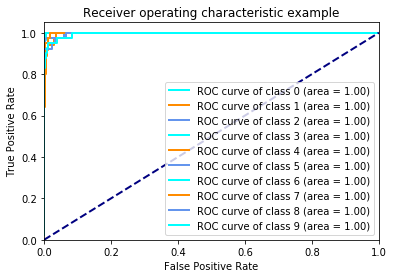

In [19]:
import matplotlib.pyplot as plt
from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(x, digits.target, test_size=.2, random_state=0)
y_score = LRclf.fit(X_train, y_train).predict(X_test)
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, y_score))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.89      0.94      0.92        35
          2       0.97      0.94      0.96        36
          3       0.94      1.00      0.97        29
          4       1.00      1.00      1.00        30
          5       0.97      0.97      0.97        40
          6       0.98      0.98      0.98        44
          7       0.95      0.97      0.96        39
          8       0.92      0.92      0.92        39
          9       0.97      0.88      0.92        41

avg / total       0.96      0.96      0.96       360




In [21]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_score)
print(matrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1  0  1  0]
 [ 0  0 34  1  0  0  0  0  1  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  0  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  2  1 36]]


In [22]:
score = LRclf.score(X_test, y_test)
print(score)

0.958333333333


In [23]:
LRclf.best_params_

{'C': 1.0,
 'fit_intercept': False,
 'max_iter': 1000,
 'penalty': 'l1',
 'tol': 0.01}

In [24]:
LRclf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)

In [25]:
LRclf.best_score_

0.9679888656924147